#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://adityassrana.github.io/blog/theory/2020/08/26/Weight-Init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html
* https://seaborn.pydata.org/examples/errorband_lineplots.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [1]:
import torch as th
import torch.nn as nn

In [2]:
fc = nn.Linear(in_features=5, out_features=3)

In [3]:
fc.weight

Parameter containing:
tensor([[-0.1306, -0.1362, -0.4424, -0.3994,  0.0713],
        [ 0.4017,  0.0070, -0.1368,  0.2033, -0.0053],
        [-0.3107,  0.2057, -0.3861, -0.4472,  0.0367]], requires_grad=True)

In [4]:
nn.init.ones_(fc.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)

In [5]:
fc.weight

Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)

2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [6]:
model = nn.Sequential(
    # ...
    nn.Dropout(p=0.5)
)

In [7]:
X = th.randn(1, 5)
X

tensor([[ 1.4858,  1.8004, -1.4851,  1.7628, -0.3834]])

In [8]:
model(X) # scale: 1/(1-p)

tensor([[ 2.9715,  3.6009, -0.0000,  0.0000, -0.7668]])

In [9]:
model.eval()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

In [10]:
model(X)

tensor([[ 1.4858,  1.8004, -1.4851,  1.7628, -0.3834]])

In [11]:
model.train()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [12]:
X = th.randn(100, 5)
X[:10]

tensor([[ 1.5208,  0.2367, -0.6347,  0.0283,  1.1497],
        [ 0.9112,  1.9529, -2.2567, -0.3875, -0.1233],
        [-0.6334,  0.4058, -0.3879, -1.2850,  1.3115],
        [ 0.3774, -0.3434,  0.3329, -1.4956, -0.2652],
        [ 0.3908, -1.5745,  0.1461, -0.0736,  0.5621],
        [-0.9891,  0.9763,  0.3797, -0.5254, -0.7508],
        [ 0.8288,  1.0674,  0.4114, -0.4815, -0.2060],
        [ 2.3714, -1.7501, -0.9595,  2.7524,  0.6390],
        [-1.0462,  0.0365, -1.1564, -0.8731,  0.0368],
        [ 0.4510, -0.0960,  0.2458,  1.9514, -0.1801]])

In [13]:
X.mean(dim=0), X.std(dim=0), X.var(dim=0)

(tensor([ 0.1661, -0.0788, -0.0026,  0.1195, -0.1755]),
 tensor([0.9512, 1.0265, 0.9608, 1.0279, 0.8976]),
 tensor([0.9047, 1.0537, 0.9232, 1.0566, 0.8056]))

In [14]:
bn = nn.BatchNorm1d(num_features=5)
y = bn(X)

In [15]:
y.mean(dim=0), y.std(dim=0), y.var(dim=0)

(tensor([-3.5763e-08,  1.4305e-08,  3.5763e-09,  4.1723e-08, -3.8147e-08],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>),
 tensor([1.0101, 1.0101, 1.0101, 1.0101, 1.0101], grad_fn=<VarBackward0>))

In [16]:
bn.weight, bn.bias

(Parameter containing:
 tensor([1., 1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0.], requires_grad=True))

In [17]:
bn.running_mean

tensor([ 0.0166, -0.0079, -0.0003,  0.0119, -0.0176])

In [18]:
bn.running_var

tensor([0.9905, 1.0054, 0.9923, 1.0057, 0.9806])

In [19]:
model.eval()

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

In [20]:
y = bn(X)
y.mean(dim=0), y.std(dim=0), y.var(dim=0)

(tensor([-3.5763e-08,  1.4305e-08,  3.5763e-09,  4.1723e-08, -3.8147e-08],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>),
 tensor([1.0101, 1.0101, 1.0101, 1.0101, 1.0101], grad_fn=<VarBackward0>))

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init` (инициализацию bias оставьте по умолчанию). Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```

- [ ] Проверено на семинаре

In [21]:
import torch.nn as nn
from typing import Callable

class InitializedLinear(nn.Linear):
    def __init__(self, n_features: int, n_hidden: int, init_f: Callable, init_args: dict) -> None:
        super().__init__(n_features, n_hidden)
        init_f(self.weight, **init_args)

In [22]:
lin = InitializedLinear(2, 1, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
lin.weight

Parameter containing:
tensor([[0.9661, 0.4500]], requires_grad=True)

<p class="task" id="2"></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`
* `nn.xavier_normal_`
* `nn.kaiming_normal_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Обратите внимание, что от запуска к запуску результаты могут отличаться. Чтобы решить эту проблему, обучайте каждую модель несколько раз и визуализируйте доверительный интервал (можно воспользоваться `seaborn.lineplot`).

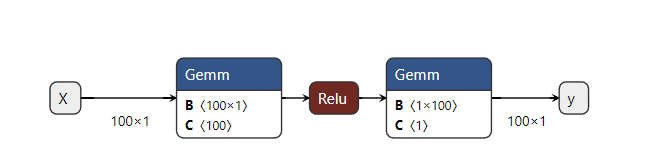

- [ ] Проверено на семинаре

In [23]:
import torch as th
X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())

In [24]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16)

In [25]:
methods = (
    (nn.init.uniform_, {'a': 0.0, 'b': 1.0},),
    (nn.init.normal_, {'mean': 0.0, 'std': 1.0}),
    (nn.init.constant_, {'val': 1.0}),
    (nn.init.xavier_uniform_, {'gain': 1.0}),
    (nn.init.kaiming_uniform_, {'a': 0.0, 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}),
    (nn.init.xavier_normal_, {'gain': 1.0}),
    (nn.init.kaiming_normal_, {'a': 0.0, 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'})
)

In [26]:
runs = 10
epochs = 3

In [27]:
from torch import optim
import numpy as np

final_losses = []
for method, kwargs in methods:
    run_losses = []
    for run in range(runs):
        model = nn.Sequential(
            InitializedLinear(n_features=1, n_hidden=100, init_f=method, init_args=kwargs),
            nn.ReLU(),
            InitializedLinear(n_features=100, n_hidden=1, init_f=method, init_args=kwargs),
        )

        criterion = nn.MSELoss()
        optimizer = optim.SGD(model.parameters())

        model.train()
        epoch_losses = []
        for epoch in range(epochs):
            epoch_loss = 0
            for X_batch, y_batch in loader:
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                epoch_loss += loss.item()
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            epoch_losses.append(epoch_loss / len(loader))
        run_losses.append(epoch_losses)

    final_losses.append(run_losses)

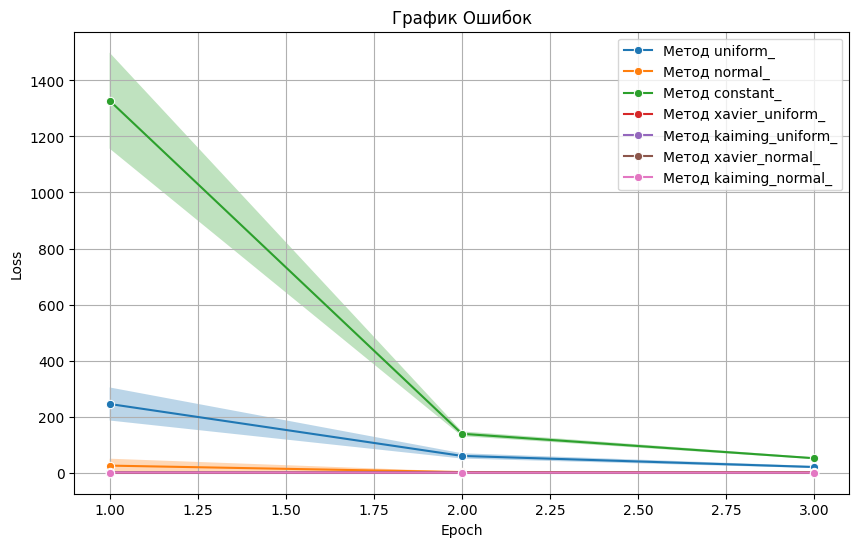

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

epochs_range = range(1, epochs + 1)
plt.figure(figsize=(10, 6))
final_losses_np = np.array(final_losses)
for i, (method, kwargs) in enumerate(methods):
    mean = final_losses_np[i].mean(axis=0)
    std = final_losses_np[i].std(axis=0)
    sns.lineplot(x=epochs_range, y=mean, label=f'Метод {method.__name__}', marker='o')
    plt.fill_between(epochs_range, mean - std, mean + std, alpha=0.3)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('График Ошибок')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="3"></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

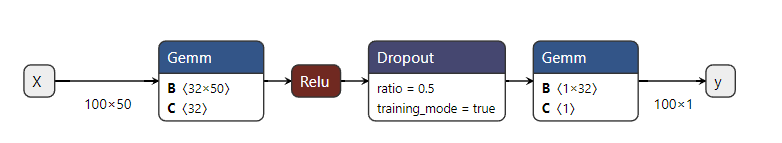

- [ ] Проверено на семинаре

In [29]:
from sklearn.datasets import make_regression
from torch.utils.data import random_split
import torch as th

th.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100,
    n_features=50,
    n_informative=20,
    noise=2,
    coef=True,
    random_state=42,

)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
dataset = TensorDataset(X, y)
dataset_train, dataset_test = random_split(TensorDataset(X, y), [0.8, 0.2])
dataloader_train = DataLoader(dataset_train, batch_size=16)
dataloader_test = DataLoader(dataset_test, batch_size=16)

In [30]:
from torchmetrics import R2Score

epoch_max = 20
p_list = th.linspace(0, 0.8, 10)

loss_list = []
for p in p_list:
    model = nn.Sequential(
        nn.Linear(in_features=50, out_features=32),
        nn.ReLU(),
        nn.Dropout(p=p),
        nn.Linear(in_features=32, out_features=1)
    )
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters())

    for epoch in range(epoch_max):
        model.train()
        for X_batch, y_batch in dataloader_train:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
    model.eval()
    with th.no_grad():
        loss = 0
        y_pred_train = model(dataset_train[:][0])
        loss_train = R2Score()(y_pred_train, dataset_train[:][1]).item()

        y_pred_test = model(dataset_test[:][0])
        loss_test = R2Score()(y_pred_test, dataset_test[:][1]).item()

        loss_list.append((p, loss_train, loss_test))

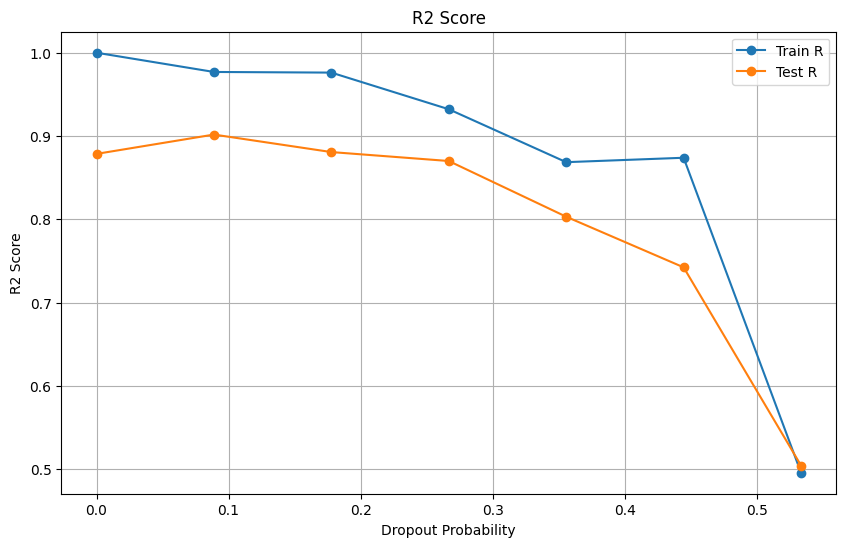

In [31]:
import pandas as pd

df = pd.DataFrame(loss_list, columns=['p', 'train', 'test'])

plt.figure(figsize=(10, 6))
plt.plot(df['p'], df['train'], label='Train R', marker='o')
plt.plot(df['p'], df['test'], label='Test R', marker='o')

plt.xlabel('Dropout Probability')
plt.ylabel('R2 Score')
plt.title('R2 Score')
plt.legend()
plt.grid(True)
plt.show()

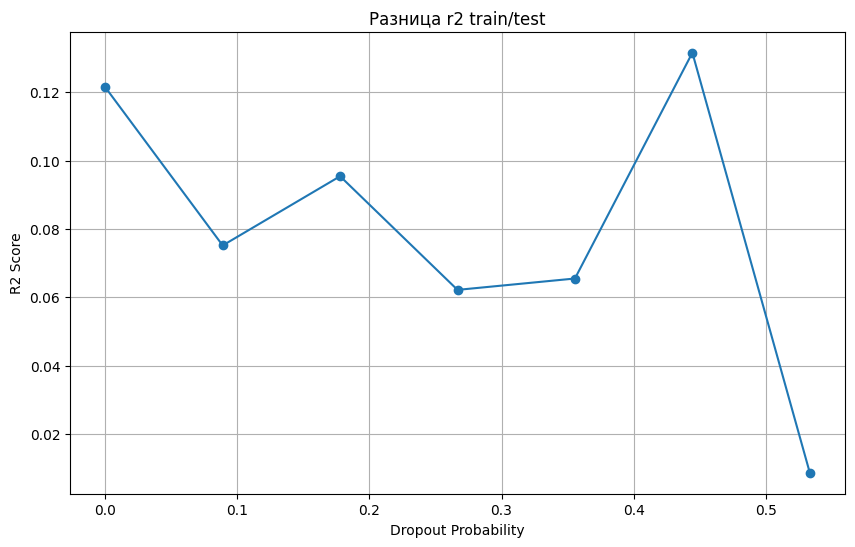

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df['p'], abs(df['train'] - df['test']), marker='o')
plt.xlabel('Dropout Probability')
plt.ylabel('R2 Score')
plt.title('Разница r2 train/test')
plt.grid(True)
plt.show()

<p class="task" id="4"></p>

4\. Решите задачу регрессии с и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с и без использования пакетной нормализации.

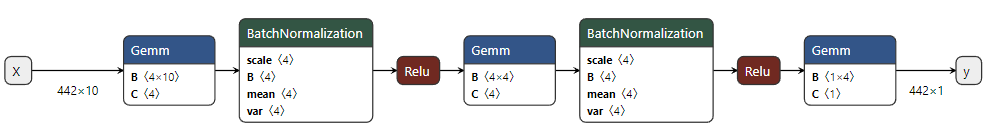

- [ ] Проверено на семинаре

In [33]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
y = (y - y.mean()) / y.std()

In [34]:
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16)

In [35]:
lr_range = [0.001, 0.01, 0.1]
iter_list = [(i, 0) for i in lr_range] + [(i, 1) for i in lr_range]
epoch_max = 250

data_without_norm = []
for lr, norm in iter_list:
    if norm:
        model = nn.Sequential(
            nn.Linear(10, 4),
            nn.BatchNorm1d(num_features=4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.BatchNorm1d(num_features=4),
            nn.ReLU(),
            nn.Linear(4, 1),
        )
    else:
        model = nn.Sequential(
            nn.Linear(10, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
        )
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    r2 = []
    for epoch in range(epoch_max):
        r2_metric = R2Score()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred.flatten(), y_batch.flatten())
            r2_metric.update(y_pred.flatten(), y_batch.flatten())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        r2.append(r2_metric.compute().item())

    data_without_norm.append((lr, norm, r2))

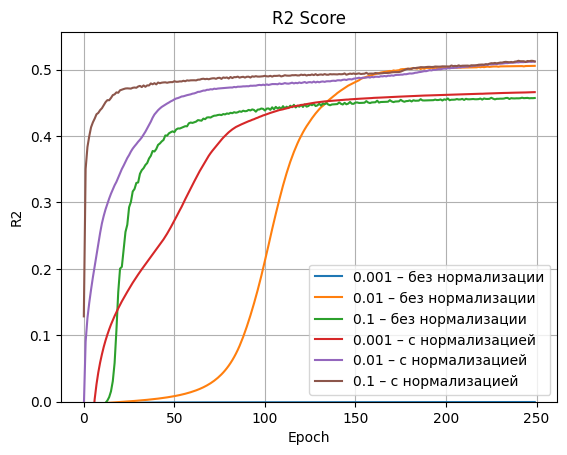

In [36]:
plt.title('R2 Score')
for item in data_without_norm:
    plt.plot(item[2], label=f'{item[0]} – {'без нормализации' if item[1] == 0 else 'с нормализацией'}')
plt.grid(True)
plt.legend()
plt.ylabel('R2')
plt.xlabel('Epoch')
plt.ylim(bottom=0)
plt.show()

<p class="task" id="5"></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagrad, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения. Используйте модель с архитектурой, аналогичной модели из предыдущей задачи.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

- [ ] Проверено на семинаре

In [37]:
def load_boston():
    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [38]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [39]:
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=10)
optimizers = [optim.Adam, optim.Adagrad, optim.RMSprop, optim.SGD]

In [40]:
from torchmetrics import MeanAbsolutePercentageError

epoch_max = 40

results = []
data = []
for optimizer_ in optimizers:
    model = nn.Sequential(
        nn.Linear(13, 4),
        nn.BatchNorm1d(num_features=4),
        nn.ReLU(),
        nn.Linear(4, 4),
        nn.BatchNorm1d(num_features=4),
        nn.ReLU(),
        nn.Linear(4, 1),
    )
    criterion = nn.MSELoss()
    optimizer = optimizer_(model.parameters(), lr=0.01)

    mape = []
    for epoch in range(epoch_max):
        mape_metric = MeanAbsolutePercentageError()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred.flatten(), y_batch.flatten())
            mape_metric.update(y_pred.flatten(), y_batch.flatten())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        mape.append(mape_metric.compute().item())

    data.append((optimizer_.__name__, mape))

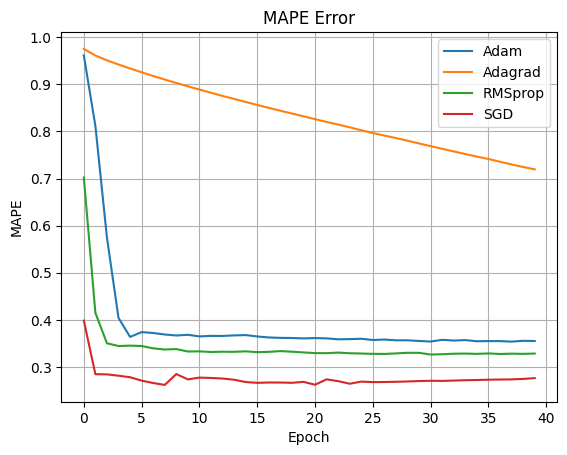

In [41]:
plt.title('MAPE Error')
for item in data:
    plt.plot(item[1], label=f'{item[0]}')
plt.grid(True)
plt.legend()
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.show()